In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 17 12:06:58 2024

@author: laserglaciers
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import geopandas as gpd
import matplotlib.ticker as ticker
import string


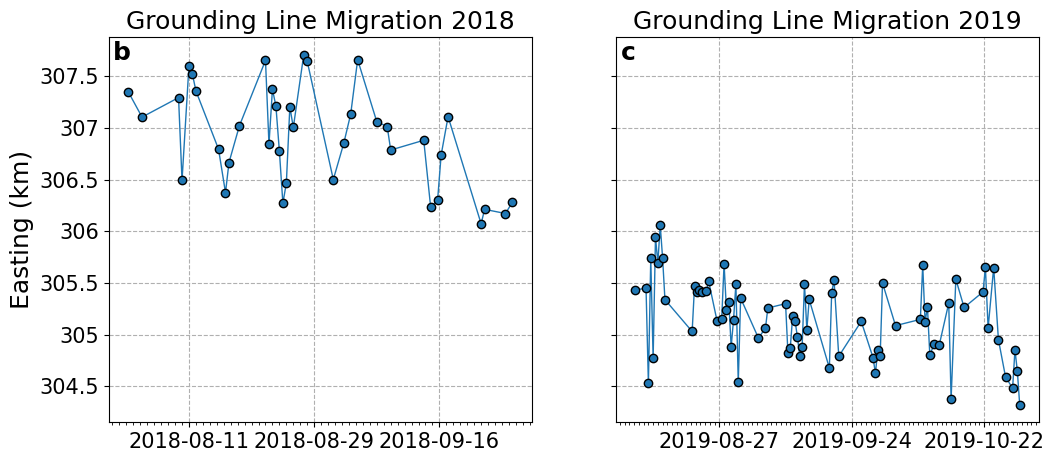

In [3]:
gl_time_series = '../data/ground_lines_and_grounding_zones//gl_scatter.pkl'

fig, ax = plt.subplots(1,2, figsize=(12,5), sharey=True)
label_dict = {'fontsize': 18}
labelsize = 15


gl_series = gpd.pd.read_pickle(gl_time_series)
gl_mask18 = gl_series.index.year == 2018
gl_mask19 = gl_series.index.year == 2019

gl_series_18 = gl_series[gl_mask18]
gl_series_19 = gl_series[gl_mask19]

last_18 = gl_series_18.index[-1]
first_19 = gl_series_19.index[0]

# ax.axvspan(last_18,first_19,facecolor='gray',alpha=0.2)

ax[0].grid(ls='--',zorder=1)

ax[0].plot(gl_series_18.index, gl_series_18.values, '-o',
        zorder=2, markeredgecolor='k', linewidth=1, color='tab:blue')

# ax[0].plot(gl_series_19.index, gl_series_19.values, '-o',
#         zorder=2, markeredgecolor='k', linewidth=1, color='tab:blue')




m2km = lambda x, _: f'{x/1000:g}'

ax[0].set_ylabel('Easting (km)', **label_dict)
ax[0].yaxis.set_major_formatter(m2km)

# loc = ticker.MultipleLocator(base=500)
# ax[0].yax[0]is.set_minor_locator(loc)

ax[0].set_title('Grounding Line Migration 2018', **label_dict)

date_format = mdates.DateFormatter('%Y-%m-%d')  # Format: Year-Month-Day

# Set the formatter for the x-axis
ax[0].xaxis.set_major_formatter(date_format)

ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=18))
ax[0].xaxis.set_minor_locator(mdates.DayLocator(interval=1))

ax[0].tick_params(axis='both', which='major', labelsize=labelsize)

#%% 2019

ax[1].set_title('Grounding Line Migration 2019', **label_dict)
ax[1].grid(ls='--',zorder=1)

ax[1].plot(gl_series_19.index, gl_series_19.values, '-o',
        zorder=2, markeredgecolor='k', linewidth=1, color='tab:blue')

# Set the formatter for the x-axis
ax[1].xaxis.set_major_formatter(date_format)

ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=28))
ax[1].xaxis.set_minor_locator(mdates.DayLocator(interval=1))

ax[1].tick_params(axis='both', which='major', labelsize=labelsize)

alphabet = list(string.ascii_lowercase)
text_dict = {'fontsize':18,
             'fontweight': 'bold'}




for i,axis in enumerate(ax):
    text_label = axis.text(.01, .99, alphabet[i+1], ha='left', va='top', transform=axis.transAxes, **text_dict)
    